## Stochastic  gradient descent

In Stochastic Gradient Descent, a few samples are selected randomly instead of the whole data set for each iteration. In Gradient Descent, there is a term called “batch” which denotes the total number of samples from a dataset that is used for calculating the gradient for each iteration. In typical Gradient Descent optimization, like Batch Gradient Descent, the batch is taken to be the whole dataset. Although, using the whole dataset is really useful for getting to the minima in a less noisy or less random manner, but the problem arises when our datasets get really huge.

This problem is solved by Stochastic Gradient Descent. In SGD, it uses only a single sample, i.e., a batch size of one, to perform each iteration. The sample is randomly shuffled and selected for performing the iteration.

Stochastic GD - noise is more but training time is less

Batch GD - noise is less but training time is more


## Stochastic  gradient descent with momentum

Using momentum reduces the noise as momentum(beta) is the moving average of the gradients which brings the predicted value closer to the original funtion. Momentum is used for making the predicted value fastly converge towards the original function.

The value of beta lies between 0 and 1(both inclusive)

Optimum value of beta is considered to be 0.9

Sequence of weighted averages is given by:

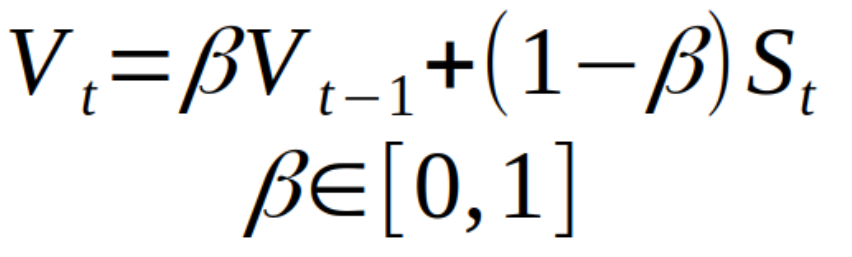

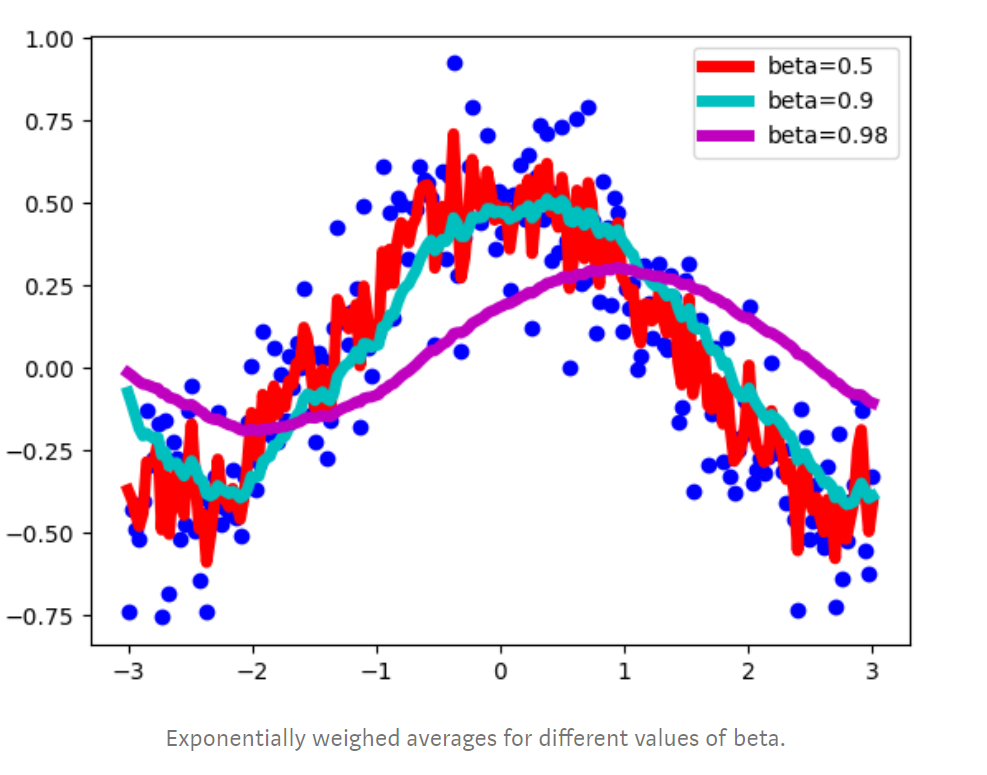

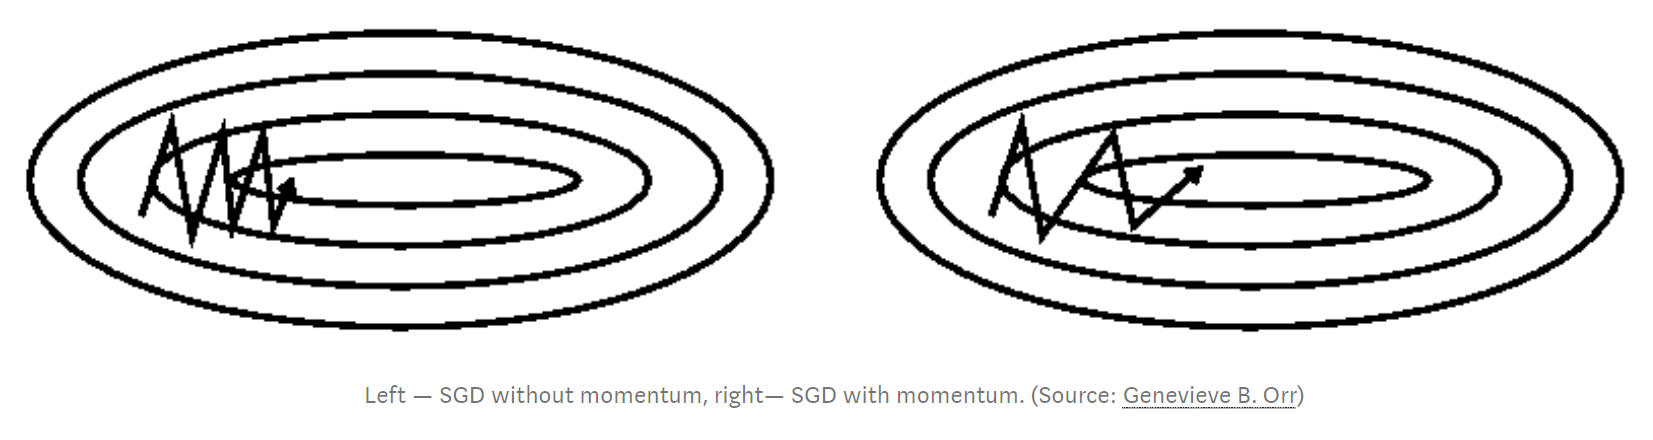

In [2]:
def get_minibatch(X, y, minibatch_size):
    minibatches = []

    X, y = shuffle(X, y)

    for i in range(0, X.shape[0], minibatch_size):
        X_mini = X[i:i + minibatch_size]
        y_mini = y[i:i + minibatch_size]

        minibatches.append((X_mini, y_mini))

    return minibatches


def sgd(model, X_train, y_train, minibatch_size):
    minibatches = get_minibatch(X_train, y_train, minibatch_size)

    for iter in range(1, n_iter + 1):
        idx = np.random.randint(0, len(minibatches))
        X_mini, y_mini = minibatches[idx]

        grad = get_minibatch_grad(model, X_mini, y_mini)

        for layer in grad:
            model[layer] += alpha * grad[layer]

    return model

def momentum(model, X_train, y_train, minibatch_size):
    velocity = {k: np.zeros_like(v) for k, v in model.items()}
    gamma = .9

    minibatches = get_minibatch(X_train, y_train, minibatch_size)

    for iter in range(1, n_iter + 1):
        idx = np.random.randint(0, len(minibatches))
        X_mini, y_mini = minibatches[idx]

        grad = get_minibatch_grad(model, X_mini, y_mini)

        for layer in grad:
            velocity[layer] = gamma * velocity[layer] + alpha * grad[layer]
            model[layer] += velocity[layer]

    return model